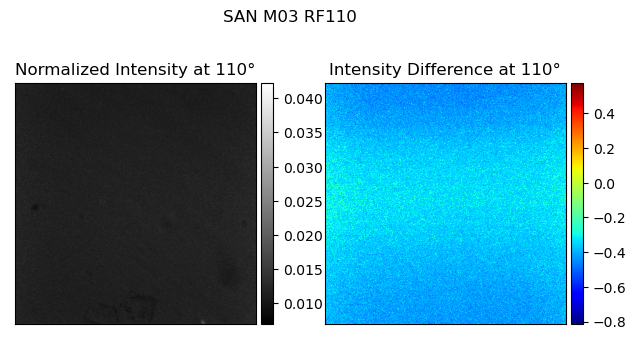

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import os, glob
from mpl_toolkits.axes_grid1 import make_axes_locatable


def view(src_dir):
    sample_files = list(filter(os.path.isfile, glob.glob(src_dir + "*.npy")))
    sample_files.sort(key=lambda x: os.path.getmtime(x))
    latest_measurements = sample_files[-35:]
    for idx, file in enumerate(latest_measurements):
            latest_measurements[idx] = file.replace('\\', '/')
        # TODO: Get sample names of specific phase angles
    sample_measurements = []
    phase_angles = ["110"]
    for measurement in latest_measurements:
        if measurement.split('_')[3][2:-4] in phase_angles:
            img = np.load(measurement)
            measurement = measurement.split('/')[-1][:-4]
            title_string = f"{' '.join(measurement.split('_'))}"
            #print(img.shape)
            flim_plot(img[0, :, :], img[1, :, :], int(measurement.split('_')[2][2:]), title_string)



def flim_plot(ni, nid, phase_angle, title_string):
    plt.close('all')
    fig = plt.figure(figsize=(7.33, 4))
    fig.suptitle(title_string)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    im1 = plt.imshow(np.asarray(ni), cmap='gray')
    ax1.set_title('Normalized Intensity at ' + str(phase_angle) + '°')
    colorbar(im1)
    plt.clim(np.min(ni), np.max(ni))

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.axes.get_xaxis().set_visible(False)
    ax2.axes.get_yaxis().set_visible(False)
    ax2.set_title('Intensity Difference at ' + str(phase_angle) + '°')
    im2 = plt.imshow(np.asarray(nid), cmap='jet')
    colorbar(im2)
    plt.clim(np.min(nid), np.max(nid))
def colorbar(mappable):
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar
    
if __name__ == '__main__':
    root_dir = 'D:\\new_np\\'
    for polymer in os.listdir(root_dir):
        src_dir = f"{root_dir}/{polymer}/"
        view(src_dir)

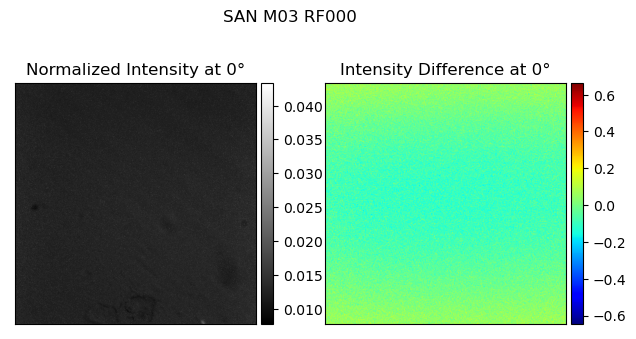